In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def f(x):
    return 3*x**2 + 2*x



In [4]:
xs = np.arange(-7,7,1)
xs

array([-7, -6, -5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5,  6])

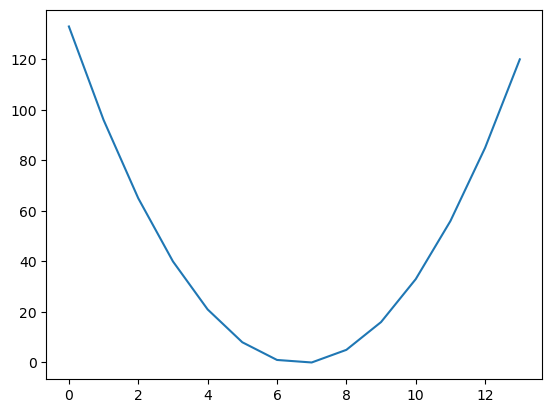

In [5]:
plt.plot(f(xs))
plt.show()

In [6]:
h = 0.001
x = 6.5
f(x)

139.75

In [7]:
#derivative
(f(x+h)- f(x))/h

41.003000000017664

Lets take an function with 3 variables

In [8]:
a = 2.0
b = -3.0
c = 5.0

d = a*b+ c
d

-1.0

In [9]:
h = 0.0001
d1 = a*b+ c

a += h

d2 = a*b+ c

derivative = (d2-d1)/h
derivative

-3.000000000010772

In [10]:
d1

-1.0

Slope with respect to c

In [11]:
h = 0.0001
a = 2.0
b = -3.0
c = 10.0

d1 = a*b +c
c += h
d2 = a*b +c

print('d1',d1)
print('d2',d2)
print("Slope",(d2-d1)/h)

d1 4.0
d2 4.0001
Slope 0.9999999999976694


In [ ]:
class Value:
    def __init__(self,data,_children=(),_op = "",label = ""):
        self.data = data
        self.grad = 0.0
        self._prev = set(_children)
        self._op = _op
        self.label = label
    def __repr__(self):
        return f"Value(data={self.data})"
    def __add__(self,other):
        out = Value(self.data + other.data,(self,other),"+")
        return out
    def __mul__(self,other):
        out = Value(self.data * other.data,(self,other),"*")
        return out
    def tanh(self):
        n = self.data
        t = (math.exp(2*n)-1)/(math.exp(2*n) + 1)
        out = Value()

    
a = Value(2.0,label = "a")
b = Value(-3.0,label = "b")
c = Value(10.0,label = "c")
e = a*b ; e.label = "e"
d = e +c ; d.label = "d"
f = Value(-2.0,label = "f")
L = d * f; L.label = "L"
L

Value(data=-8.0)

In [ ]:
# found after manual derivation with numerical checking
L.grad = 1.0
f.grad = 4.0
d.grad = -2.0
c.grad = -2.0
e.grad = -2.0
b.grad = -4.0
a.grad = 6

In [33]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

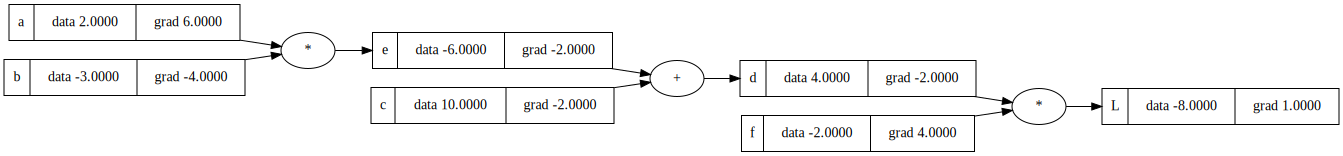

In [34]:

draw_dot(L)

In [31]:
def lol():
    h = 0.001
    a = Value(2.0,label = "a")
    b = Value(-3.0,label = "b")
    c = Value(10.0,label = "c")
    e = a*b ; e.label = "e"
    d = e +c ; d.label = "d"
    f = Value(-2.0,label = "f")
    L = d * f;L.label = "L"
    L1 = L.data

    a = Value(2.0,label = "a")
    b = Value(-3.0,label = "b")
    a.data += h
    c = Value(10.0,label = "c")
    e = a*b ; e.label = "e"
    d = e +c ; d.label = "d"
    f = Value(-2.0,label = "f")
    L = d * f; L.label = "L"
    L2 = L.data
    print((L2-L1)/h)
lol()

6.000000000000227


In [36]:
a.data += 0.01 * a.grad
b.data += 0.01 * b.grad
c.data += 0.01 * c.grad
f.data += 0.01 * f.grad

e = a*b
d = e +c 
L = d * f
L

Value(data=-6.586368000000001)

A more complex example of manual backpropagartion

In [ ]:
x1 = Value(2.0,label = "x1")
x2 = Value(0.0,label = "x2")
w1 = Value(-3.0,label = "w1")
w2 = Value(1.0,label = "w2")
b = Value(6.7,label = "b")
x1w1 = x1*w1 ; x1w1.label = "x1*w1"
x2w2 = x2*w2 ; x2w2.label = "x2*w2"
x1w1x2w2 = x1w1 + x2w2 ; x1w1x2w2.label = "x1*w1 + x2+w2"
n = x1w1x2w2 + b ; n.label = "n"
o = n.tanh()

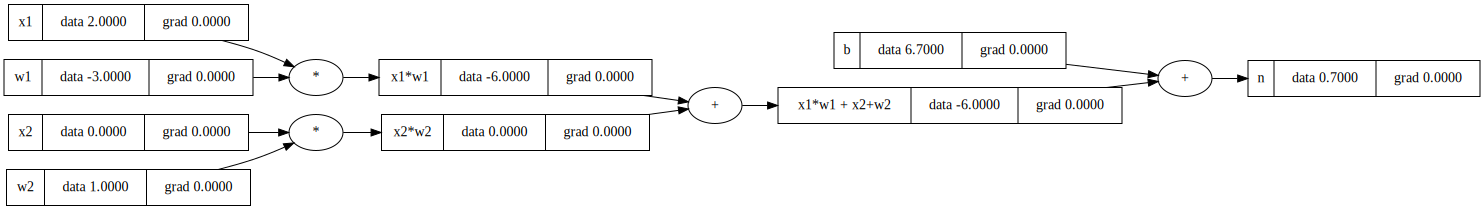

In [38]:
draw_dot(n)